In [ ]:
from google.colab import drive

In [ ]:
#drive.mount('content/drive')

## **타이타닉**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
Survived, Pclass는 info()에서 int64지만 **범주형 변수**(범주형 or 수치형 데이터인데 수치자료가 아니므로)이므로 pandas의 astype()으로 변수의 타입을 전환

In [ ]:
df["Survived"] = df["Survived"].astype(str)
df["Pclass"] = df['Pclass'].astype(str)

In [ ]:
df.info()
# p69에서 Age Cabin Embarked 에서 결측치 있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all')

# unique : 변수에 저장된 범주의 수
# top : 가장 많이 출력하는 값, freq: 가장 많이 출현하는 값의 개수

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


---
* Survived : 분석의 목표변수이며 0은 사망자, 1은 생존자를 표현한다.
* Pclass : 1등급, 2등급, 3등급으로 범주가 세 개인데 3등급 승객이 가장 많다(491명) -> *pandas의 **groupby()**를 이용*
* Name : 이름이 비슷한 사람들이 있다. 따라서 혼자 탄 승객도 있지만 가족들과 같이 탑승한 승객도 있음을 알 수 있다.
* Sex : 남성은 577명, 여성은 314명으로 남성이 여성보다 2배 가까이 더 많다.
* Age : 0.42부터 80세까지 있는데 177개의 결측치가 존재한다. (891-714개)
* SibSp : 0부터 8까지 있는데 **3분위수가 1**이므로 부부 혹은 *형제와 함께 타이타닉호에 탑승했음을 알 수 있다.*
* Parch : 0부터 6까지 있지만 **3분위수가 0인 것**을 통해서 *부모, 자녀들과 함께 탄 승객들이 거의 없음*을 알 수 있다.

SibSp(동승가족수:형제/배우자)와 Parch(동승가족수:부모/자녀)는 모두 가족관계를 나타내는 변수들이다. 이를 통해서 가족 중 누가 탔는지는 모르지만 동승한 인원이 총 몇 명인지 구하고, 그것을 바탕으로 가족의 규모를 나타내는 범주형 파생변수를 만들 필요가 있다.
* Ticket : 승객의 티켓번호를 나타내는 변수이다.
* Fare : 0부터 512까지 숫자로, **3분위수가 31.00 이며 최댓값 512는 이상치**로 추정할 수 있다.
* Cabin : 배의 구역을 나타내는 변수이다. 결측치가 687개 있다. (891-204개)
* Embarked : 총 3개 범주로 구성이 되어있고 S가 가장 많으며 2개의 결측치가 있다.

In [ ]:
# groupby(),size()를 이용하여 Pclass 빈도수 구하기
grouped = df.groupby("Pclass")
grouped.size()

,0
Pclass,
1,216
2,184
3,491


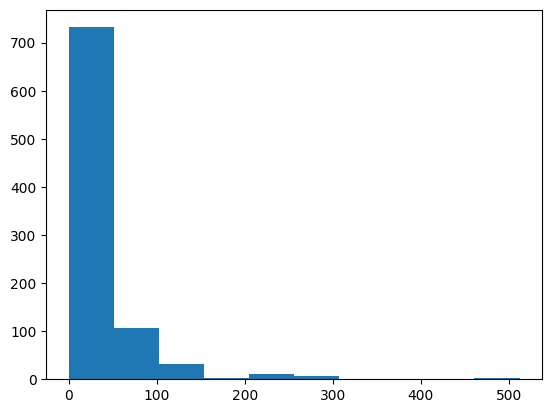

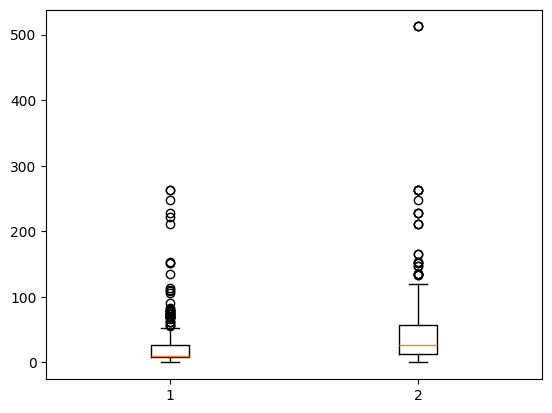

In [ ]:
#히스토그램
plt.hist(df['Fare'])
plt.show()

# Fare: 요금
data_0=df[df['Survived']=='0']['Fare']
data_1=df[df["Survived"]=='1']['Fare']

fig,ax = plt.subplots()
ax.boxplot([data_0,data_1])
plt.show()

#생존자들이 요금(Fare)이 더 높지만 그렇게 큰 차이는 x
#요금에 대한 이상치 관측 가능

In [ ]:
#Sex 분석 : 남, 여 간에 생존율의 차이가 있는가?

#빈도수 계산
grouped = df.groupby("Sex")
print(grouped.size())
print()

#성별 생존자 수
data_0 = df[df["Sex"]=='female']['Survived']  #여자의 생존 데이터
grouped = pd.DataFrame(data_0).groupby("Survived")
print(grouped.size())
print()

data_1 = df[df['Sex']=='male']['Survived']
grouped = pd.DataFrame(data_1).groupby("Survived")  # 남자의 생존 데이터
print(grouped.size())
print()

Sex
female    314
male      577
dtype: int64

Survived
0     81
1    233
dtype: int64

Survived
0    468
1    109
dtype: int64



## 데이터 전처리

**1) 표준정규화**

데이터의 범위가 같아지도록 변수별로 값을 비례적으로 조정하는 과정을 데이터 스케일링이라 하며, 대표적인 기법으로 표준정규화, Min-Max정규화가 있다.

---
**정규분포를 따르는 데이터 생성 따라하기**

한국인 1,000명의 연간 육류소비량이 53.9kg, 표준편차 5kg의 정규분포를 따르고, 일본인 성인 남성 1,000명의 육류소비량이 32.7kg, 표준편차 4kg의 정규분포를 따른다고 했을 때 두 집단의 육류소비량을 평균이 0, 표준편차 가 1인 표준정규분포로 표준화를 해본다.

In [ ]:
# np.random.rand(n) : 0~ 1 사이의 균일한 분포를 갖는 난수 n개를 생성한다.
# np.random.randint(min, max, size =n) : min ~ max 사이의 균일한 분포를 갖는 임의의 정수 n개를 생성한다.
# np.random.randn(n) : 평균 0, 표준편차 1의 표준정규분포를 갖는 난수 n개를 생성한다.
# 평균 e, 표준편차 s의 정규분포를 갖는 난수를 생성하기 위해서는 s * np.random.randn(n) + e의 식을 사용한다.

meat_consume_korea = 5*np.random.randn(1000)+53.9
meat_consume_jp = 4*np.random.randn(1000)+32.7

# 데이터프레임 생성
meat_consume = pd.DataFrame({'한국인':meat_consume_korea, '일본인': meat_consume_jp})
meat_consume.head(5)

,한국인,일본인
0,53.490684,26.820745
1,51.486459,37.211434
2,51.628032,28.788797
3,55.455340,38.634888
4,48.004000,27.434974


hist(x, bins=10, range=[-10,10], label="title")


*   bins = 지정한 수의 칸으로 나눔
*   range = 표시할 값의 범위




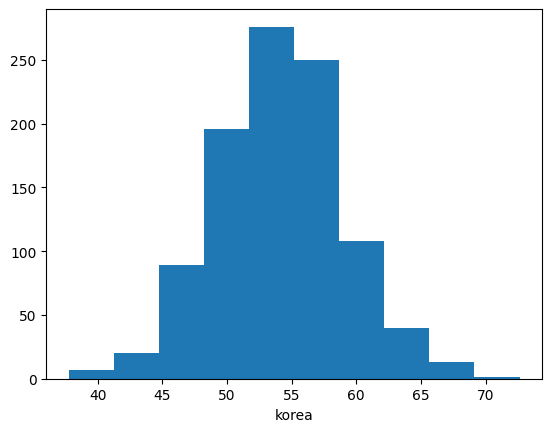

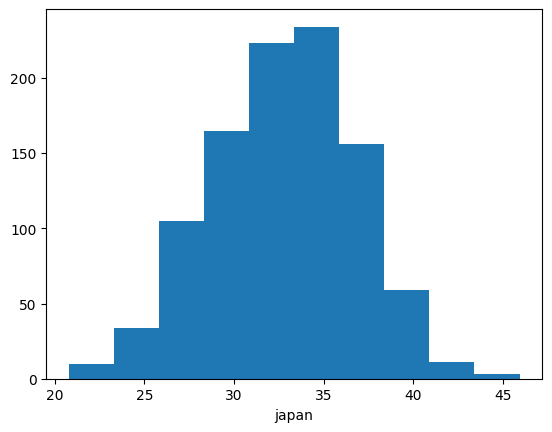

In [ ]:
plt.hist(meat_consume_korea)
plt.xlabel('korea')
plt.show()

plt.hist(meat_consume_jp)
plt.xlabel('japan')
plt.show()

파이썬에서 **Z-score** 구하는 방법

1. numpy  >> **z = (x-mean(x) / std(x) )**
2. spicy.stats >> **zscore()**
3. sklearn.preprocessing >> **StandardScaled().fit_transform()**




In [ ]:
# Z 표준화 따라하기

# 방법1

meat_consume['한국인정규화'] = (meat_consume_korea - np.mean(meat_consume_korea))/np.std(meat_consume_korea)
meat_consume['일본인정규화'] = (meat_consume_jp - np.mean(meat_consume_jp))/np.std(meat_consume_jp)

#meat_consume.head()

# 방법2

import scipy.stats as ss

meat_consume['한국인정규화2'] = ss.zscore(meat_consume_korea)
meat_consume['일본인정규화2'] = ss.zscore(meat_consume_jp)

#meat_consume.head()


# 방법3

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consume['한국인정규화3'] = scaler.fit_transform(meat_consume[['한국인']])
meat_consume['일본인정규화3'] = scaler.fit_transform(meat_consume[['일본인']])

meat_consume.head()

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화2,일본인정규화2,한국인정규화3,일본인정규화3
0,53.490684,26.820745,-0.115231,-1.489511,-0.115231,-1.489511,-0.115231,-1.489511
1,51.486459,37.211434,-0.526236,1.109480,-0.526236,1.109480,-0.526236,1.109480
2,51.628032,28.788797,-0.497204,-0.997249,-0.497204,-0.997249,-0.497204,-0.997249
3,55.455340,38.634888,0.287660,1.465524,0.287660,1.465524,0.287660,1.465524
4,48.004000,27.434974,-1.240382,-1.335876,-1.240382,-1.335876,-1.240382,-1.335876


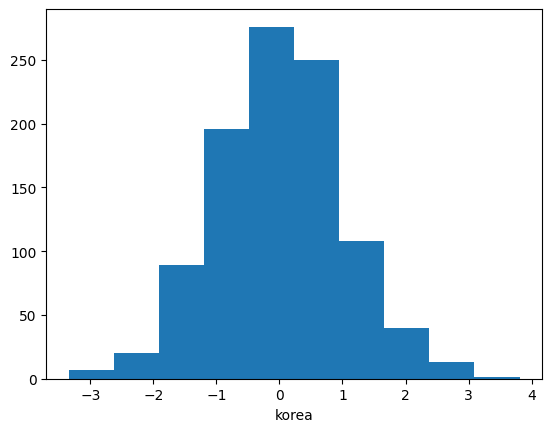

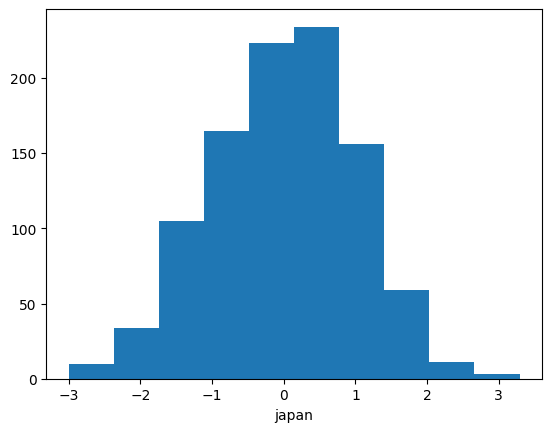

In [ ]:
# 표준화된 데이터에 대한 히스토그램

plt.hist(meat_consume['한국인정규화'])
plt.xlabel('korea')
plt.show()

plt.hist(meat_consume['일본인정규화'])
plt.xlabel('japan')
plt.show()

# 둘 다 평균이 0, 표준편차가 1인 표준정규분포로 표준화 됨

**Min-Max 정규화**

Min-Max정규화는 연속형 변수의 값 => 0과 1 사이의 값으로 변환



1.   sklearn패키지의 MinMaxScaler(), minmax_scale() 이용
2.   (x- np.min(x))/(np.max(x)-np.min(x))를 이용



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 정규화 MinMaxScaler() 함수 이용
scaler = MinMaxScaler()
meat_consume['한국인_mM'] = scaler.fit_transform(meat_consume[['한국인']])
meat_consume['일본인_mM'] = scaler.fit_transform(meat_consume[['일본인']])

# 넘파이 수식 이용

min = np.min(meat_consume_korea)
max = np.max(meat_consume_korea)
meat_consume['한국인_mM2'] = (meat_consume[['한국인']]-min)/(max-min)

min = np.min(meat_consume_jp)
max = np.max(meat_consume_jp)
meat_consume['일본인_mM2'] = (meat_consume[['일본인']]-min)/(max-min)

meat_consume[['한국인','일본인','한국인_mM','일본인_mM','한국인_mM2','일본인_mM2']].head()

,한국인,일본인,한국인_mM,일본인_mM,한국인_mM2,일본인_mM2
0,53.490684,26.820745,0.451312,0.240290,0.451312,0.240290
1,51.486459,37.211434,0.393840,0.653332,0.393840,0.653332
2,51.628032,28.788797,0.397900,0.318522,0.397900,0.318522
3,55.455340,38.634888,0.507648,0.709916,0.507648,0.709916
4,48.004000,27.434974,0.293981,0.264706,0.293981,0.264706


**왜도**



1.   양수 => 왼쪽으로 치우침
2.   음수 => 오른쪽으로 치우침
3.   0 => 좌우대칭



In [ ]:
# 깃허브에 있는 CSV 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv")
df. head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [ ]:
# 왜도 계산을 위한 scipy 패키지의 skew() 함수 사용

import scipy.stats as ss

print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


In [ ]:
# 정규환 변환 중 log()변환 이용
# p.84

df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS']+1)-df['PHYS'])

print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1'])) # 왜도가 정규화(0에 가까이) 된 것을 확인 할 수 있다

# 양수이면 x, 음수이면 max(x+1)-x

0.6555571886692603
0.5824357748750443


**범주화, 이산형화**

In [ ]:
# Data generate
data = [["철수",52],["영희",92],["미영",84],["시완",71],["미경",65],
        ["영환",81],["숙경",66],["부영",77],["민섭",73],["보연",74]]
df = pd.DataFrame(data, columns = ['이름','수학점수'])

# 조건을 사용하여 직접 구간을 지정
df["등급"] = 0        # 등급 컬럼을 생성하고 0으로 초기화
df.loc[(df["수학점수"]<60), "등급"] = "F"
df.loc[(df["수학점수"]>=60) & (df["수학점수"]<70), "등급"] = "D"
df.loc[(df["수학점수"]>=70) & (df["수학점수"]<80), "등급"] = "C"
df.loc[(df["수학점수"]>=80) & (df["수학점수"]<90), "등급"] = "B"
df.loc[(df["수학점수"]>=90) & (df["수학점수"]<=100), "등급"] = "A"
df

<ipython-input-27-9de8e0c4fdbd>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["수학점수"]<60), "등급"] = "F"


,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


***PCA(Principal Component Analysis, 주성분 분석)***

* 서로 상관성이 높은 여러변수들의 선형조합 -> 새로운 변수들로 요약, 축약

* 1번째 주성분 (전체 변동을 가장 잘 설명), 2번째 주성분 (1번과 상관성이 낮아서 1번이 설명하지 못하는 나머지 변동을 설명)
---
***PCA 절차***


1.   PCA는 **연속형변수만 사용** → 범주형 변수를 분리
2.   변수간의 스케일이 차이가 나면 스케일이 큰 변수가 주성분에 영향을 많이 주므로 → **표준화, 정규화** 실행
3. sklearn의 PCA를 이용하여 주성분 분석 → 변수 고르기



In [ ]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 iris로 넣는다
iris = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv")
iris.head(5)

# species: 범주형 변수, 나머지: 연속형 변수

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 연속형 변수와 범주형 변수 분리

df = iris.drop(['species'],axis=1) # axis=0 행기준, axis=1 열기준
df_species = iris['species']       # drop된 열을 따로 저장

df.head()

# 변수 정규화

from sklearn.preprocessing import StandardScaler

df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df["sepal_width"] = StandardScaler().fit_transform(df[["sepal_width"]])
df["petal_length"] = StandardScaler().fit_transform(df[["petal_length"]])
df["petal_width"] = StandardScaler().fit_transform(df[["petal_width"]])

# sklearn의 PCA를 이용해 변수 고르기

from sklearn.decomposition import PCA

pca = PCA(n_components = 4)     # n_components : PCA로 변환할 차원의 수
pscore = pca.fit_transform(df)
print(pscore.shape)
print(pca.explained_variance_ratio_)


(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


1. 다음 예시에서는 4차원으로 축소 되었으며,원본 데이터셋이 (150,4)의 배열오 변환됨
2. 첫번재 주성분으로 전체 변동성의 73% 설명가능하고 두번째 주성분으로 22% 설명 가능함.
즉, **두개의 주성분으로 전체 데이터의 변동성을 95.8% 설명가능하므로 2개로 줄일 수 있음.**

---
**결측치 처리**



*   결측값 식별 : **info(), isnull(), sum()** 활용

**결측치 대체**


1.   완전 분석법 : 결측값이 있는 행을 삭제 => **dropna(axis=0)**
2.   평균대치법 : 평균으로 대치 => **fillna(), mean()**
3. 단순확률 대치법 : 확률분포를 이용한 추청값 또는 주변값으로 대치 => **fillna(method='ffill')**




In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# 완전분석법
# dropna(axis=0) : 결측치가 있는 모든 행 제거

df1 = df.dropna(axis=0)
print(df1.isnull().sum())
df1.shape

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


(183, 12)

In [ ]:
# 평균대치법
print(df['Age'].isnull().sum())
age_mean = np.mean(df['Age'])
df['Age'].fillna(age_mean, inplace = True)    # 원본df를 보존하지 않고 바로 수정
print(df['Age'].isnull().sum())

177
0


<ipython-input-42-b346eb19037d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean, inplace = True)    # 원본df를 보존하지 않고 바로 수정


In [ ]:
# 최빈값으로 결측치를 대체
# scipy 패키지의 mode() 함수 : 최빈값을 구하는 함수

from scipy.stats import mode

print(df['Embarked'].isnull().sum())
embarked_mode = df['Embarked'].mode()
df['Embarked'].fillna(embarked_mode[0],inplace = True)
print(df['Embarked'].isnull().sum())


2
0


<ipython-input-46-67274284db9b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(embarked_mode[0],inplace = True)


In [ ]:
df["Embarked"].fillna(method='ffill', inplace=True)

# method = 'ffill' :  결측치가 있는 행의 직전 행에 있는 값으로 대체
# method = 'bfill' : 결측치가 있는 행의 바로 다음 행에 있는 값으로 대체

**Pclass별 age평균으로 Age컬럼의 결측치를 대체**

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


In [ ]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'),inplace=True)
df.tail()

# 889번의 승객의 Age결측치가 Pclass 3의 평균으로 대체된 것을 확인할 수 있다.

In [ ]:
df.groupby('Pclass')['Age'].mean()

,Age
Pclass,
1,37.048118
2,29.866958
3,26.403259


In [ ]:
df.groupby('Pclass')['Age'].transform('mean')   # transform() 함수 : 판다스 객체에 주어진 함수를 적용한다

,Age
0,26.403259
1,37.048118
2,26.403259
3,37.048118
4,26.403259
...,...
886,29.866958
887,37.048118
888,26.403259
889,37.048118


---
**이상치 처리**


*   이상치 : 데이터의 범위에서 크게 벗어난 값
*   분위범위, 정규분포를 이용하여 이상치 식별후, 제거 여부 판단



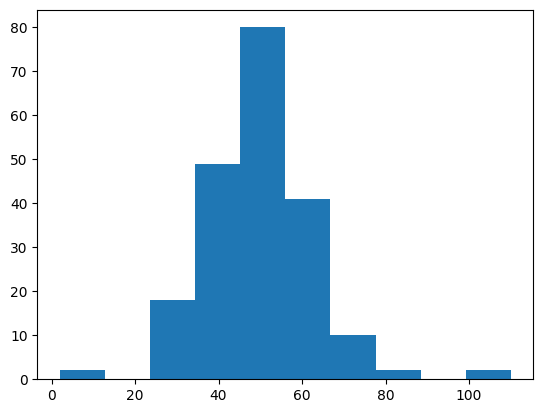

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 평균 50, 표준편차 10의 정규분포를 이루는 데이터 200개를 생성하고, 이상치를 추가한다.
data = 10*np.random.randn(200)+50
df = pd.DataFrame({'값':data})

# 임의의 이상치 삽입
df.loc[201]=2
df.loc[202]=100
df.loc[203]=10
df.loc[204]=110

# 분포시각화
plt.hist(df['값'])
plt.show()

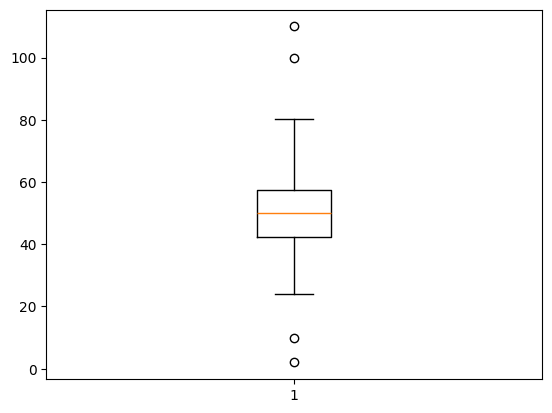

In [ ]:
# IQR(사분위범위) : 3사분위수 - 1사분위수 = IQR
# Data들이 정규분포를 그린다고 가정했을 때 사용할 수 있음.
# 1분위수:25%  2분위수:50%  3분위수:  75%

plt.boxplot(df['값'])
plt.show()                # boxplot을 그렸을 때, 점으로 나오는 샘플들이 이상치

In [ ]:
Q1 = df['값'].quantile(.25)     #1분위수
Q2 = df['값'].quantile(.50)
Q3 = df['값'].quantile(.75)
IQR = Q3-Q1

print("Q1 =",Q1)
print("Q2 =",Q2)
print("Q3 =",Q3)
print("IQR =",IQR)

Q1 = df['값'].describe()["25%"]
Q2 = df['값'].describe()['50%']
Q3 = df['값'].describe()['75%']
IQR = Q3 - Q1

print("Q1 =",Q1)
print("Q2 =",Q2)
print("Q3 =",Q3)
print("IQR =",IQR)


Q1 = 42.21961308704621
Q2 = 50.026995099027346
Q3 = 57.47905244160877
IQR = 15.25943935456256
Q1 = 42.21961308704621
Q2 = 50.026995099027346
Q3 = 57.47905244160877
IQR = 15.25943935456256


In [ ]:
# 이상치 검출
condition = df["값"] > (Q3 + IQR * 1.5)
upperOutlier = df[condition]
condition = df["값"] < (Q1 - IQR * 1.5)
lowerOutlier = df[condition]

print(lowerOutlier)
print(upperOutlier)

        값
201   2.0
203  10.0
         값
202  100.0
204  110.0


**평활화**



*   데이터의 분포를 매끄럽게 함으로써 데이터에서 중요하지 않은 것을 제거하여 데이터의 추세(경향)을 알기 쉽게 하는 것

*   이동평균(MA, Moving Average) 사용
1. 단순이동평균: 이전 n개의 데이터의 비가중 => **rolling(n).mean()**
2. 지수가중이동평균: 최근데이터에 가중치를 부여하여 이동평균을 구하는 것, 가중치를 지수함수형태로 사용 => **ewm(n).mean()**



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/lynx.csv")

print(df.head(10))
print(df.describe())

   Unnamed: 0  time  value
0           1  1821    269
1           2  1822    321
2           3  1823    585
3           4  1824    871
4           5  1825   1475
5           6  1826   2821
6           7  1827   3928
7           8  1828   5943
8           9  1829   4950
9          10  1830   2577
       Unnamed: 0         time        value
count  114.000000   114.000000   114.000000
mean    57.500000  1877.500000  1538.017544
std     33.052988    33.052988  1585.843914
min      1.000000  1821.000000    39.000000
25%     29.250000  1849.250000   348.250000
50%     57.500000  1877.500000   771.000000
75%     85.750000  1905.750000  2566.750000
max    114.000000  1934.000000  6991.000000


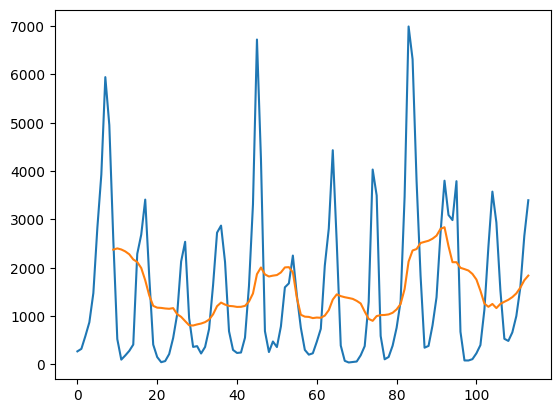

In [ ]:
# 10년 단순이동평균

df['sma'] = df['value'].rolling(10).mean()

plt.plot(df['value'])
plt.plot(df['sma'])
plt.show()

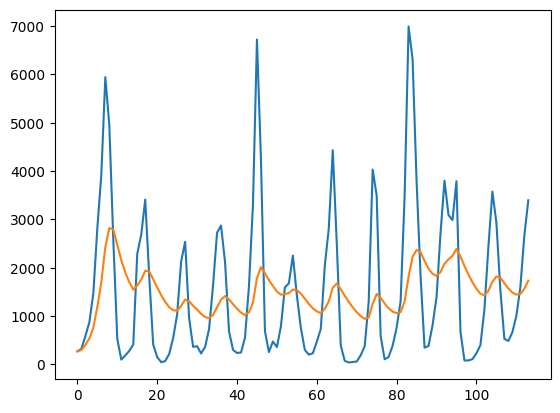

In [ ]:
# 10년 지수가중평균

df['ewm'] = df['value'].ewm(10).mean()
plt.plot(df['value'])
plt.plot(df['ewm'])
plt.show()